In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("housing.csv")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10344,-117.66,33.62,16.0,4065.0,661.0,1962.0,636.0,6.2177,<1H OCEAN,256600.0
16930,-122.32,37.57,52.0,499.0,148.0,318.0,145.0,2.9934,NEAR OCEAN,256300.0
18892,-122.24,38.11,52.0,2111.0,310.0,772.0,323.0,4.7750,NEAR BAY,148200.0
8146,-118.10,33.82,36.0,1930.0,354.0,915.0,328.0,5.2713,<1H OCEAN,244400.0
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,INLAND,189200.0
...,...,...,...,...,...,...,...,...,...,...
5637,-118.30,33.75,19.0,2356.0,440.0,1291.0,418.0,4.2308,<1H OCEAN,416100.0
16569,-121.42,37.76,18.0,5501.0,1051.0,2964.0,1009.0,4.1855,INLAND,162100.0
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861,INLAND,96200.0
5421,-118.43,34.02,41.0,2403.0,516.0,1001.0,514.0,4.3906,<1H OCEAN,500001.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

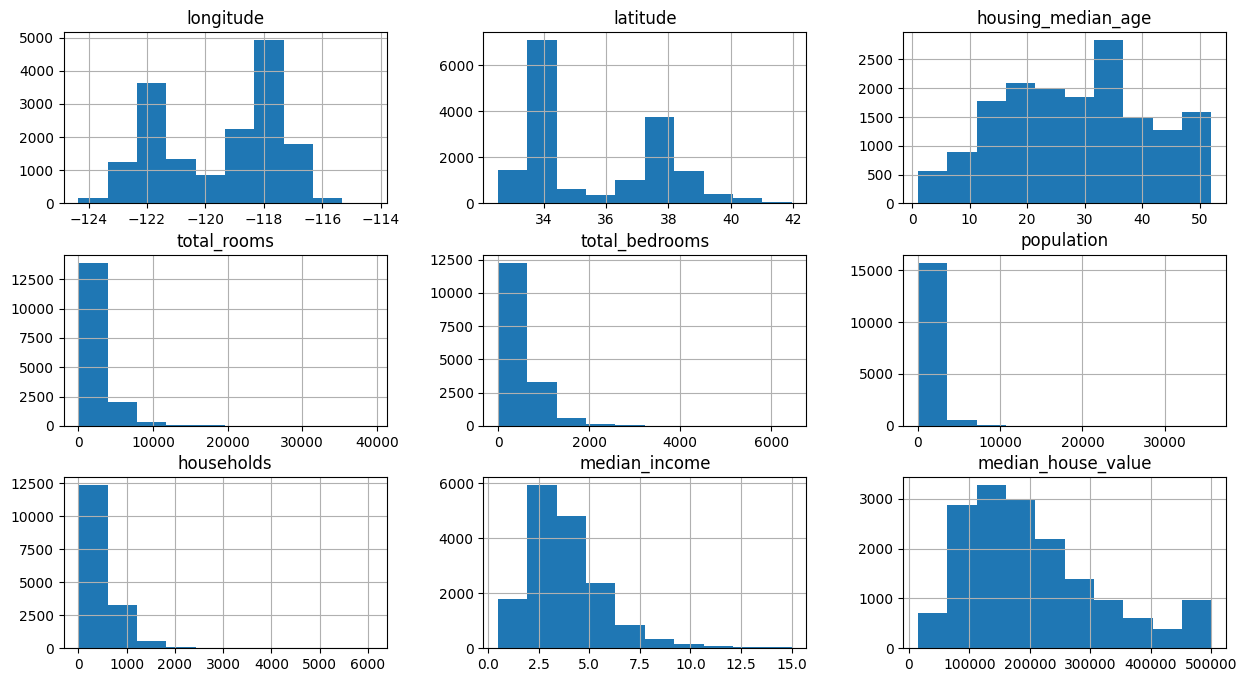

In [ ]:
train_data.hist(figsize=(15, 8))

C:\Users\dacru\AppData\Local\Temp\ipykernel_11288\1811937681.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

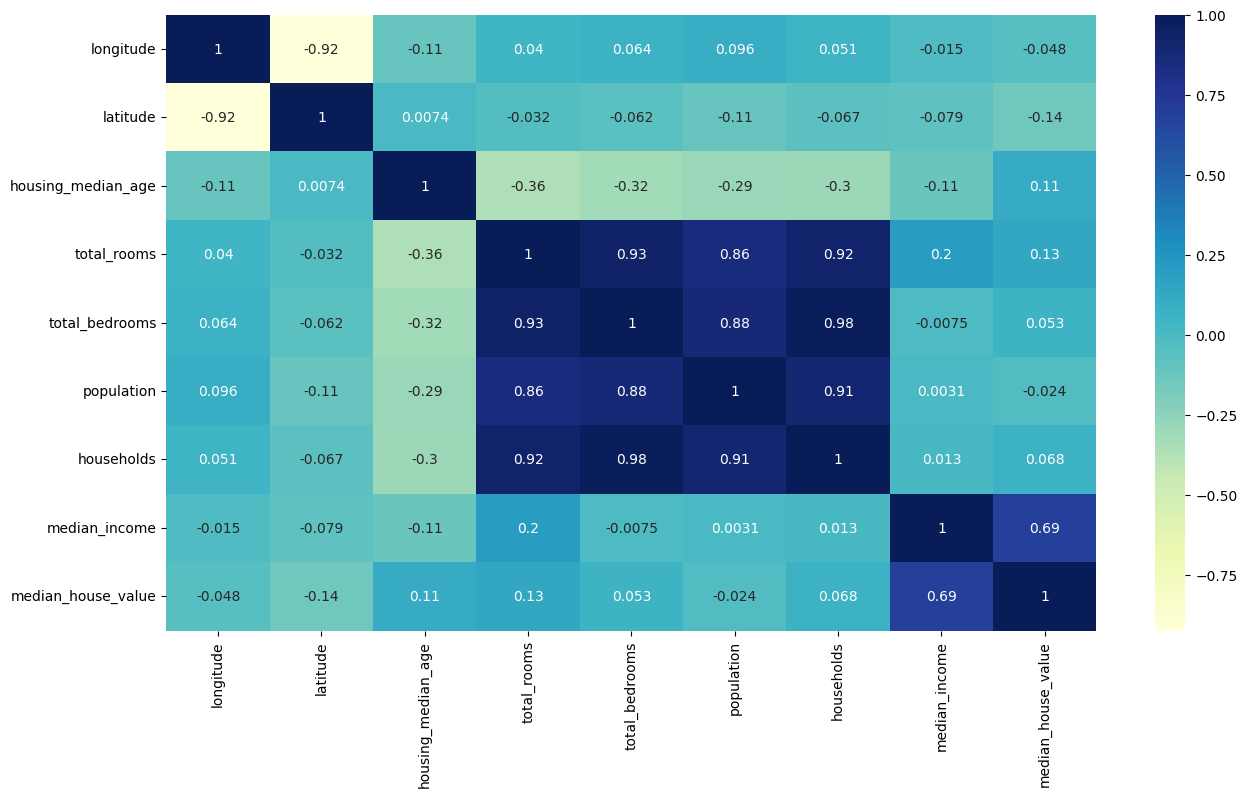

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

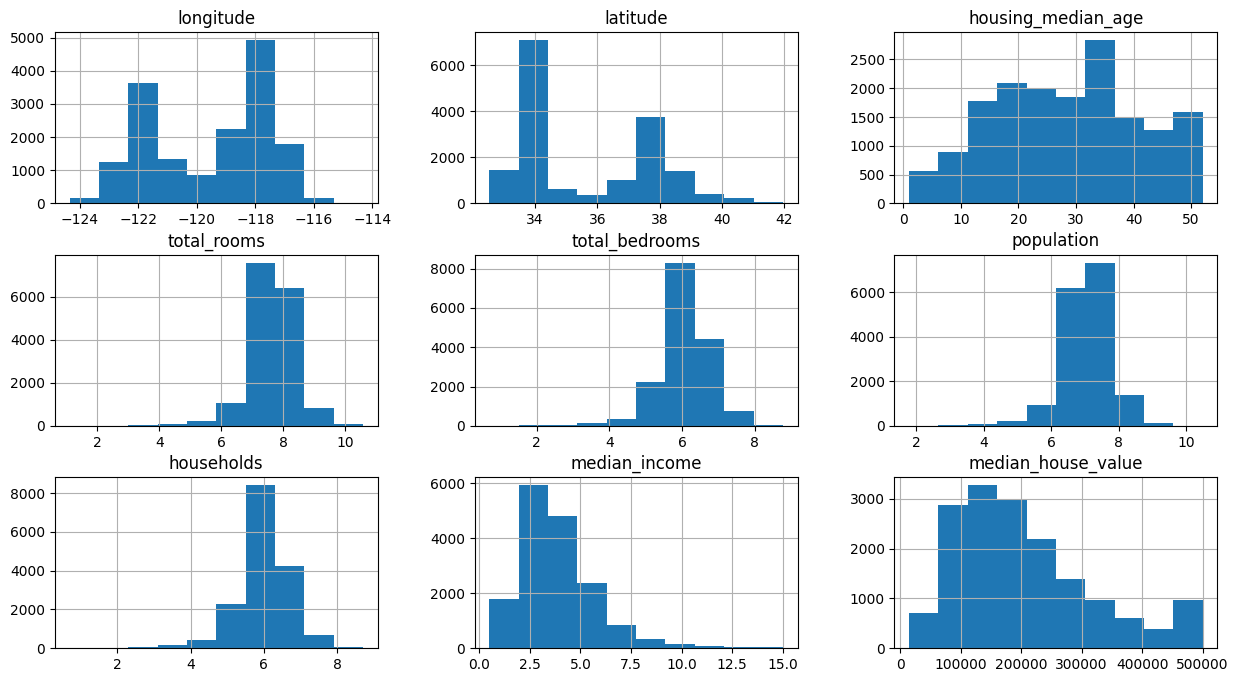

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies (train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10344,-117.66,33.62,16.0,8.310415,6.495266,7.582229,6.456770,6.2177,256600.0,1,0,0,0,0
16930,-122.32,37.57,52.0,6.214608,5.003946,5.765191,4.983607,2.9934,256300.0,0,0,0,0,1
18892,-122.24,38.11,52.0,7.655391,5.739793,6.650279,5.780744,4.7750,148200.0,0,0,0,1,0
8146,-118.10,33.82,36.0,7.565793,5.872118,6.820016,5.796058,5.2713,244400.0,1,0,0,0,0
19536,-120.93,37.65,1.0,7.720905,5.796058,5.998937,4.727388,4.2500,189200.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,-118.30,33.75,19.0,7.765145,6.089045,7.163947,6.037871,4.2308,416100.0,1,0,0,0,0
16569,-121.42,37.76,18.0,8.612867,6.958448,7.994632,6.917706,4.1855,162100.0,0,1,0,0,0
12049,-117.56,33.88,36.0,6.732211,5.351858,6.583409,5.198497,2.4861,96200.0,0,1,0,0,0
5421,-118.43,34.02,41.0,7.784889,6.248043,6.909753,6.244167,4.3906,500001.0,1,0,0,0,0


<Axes: >

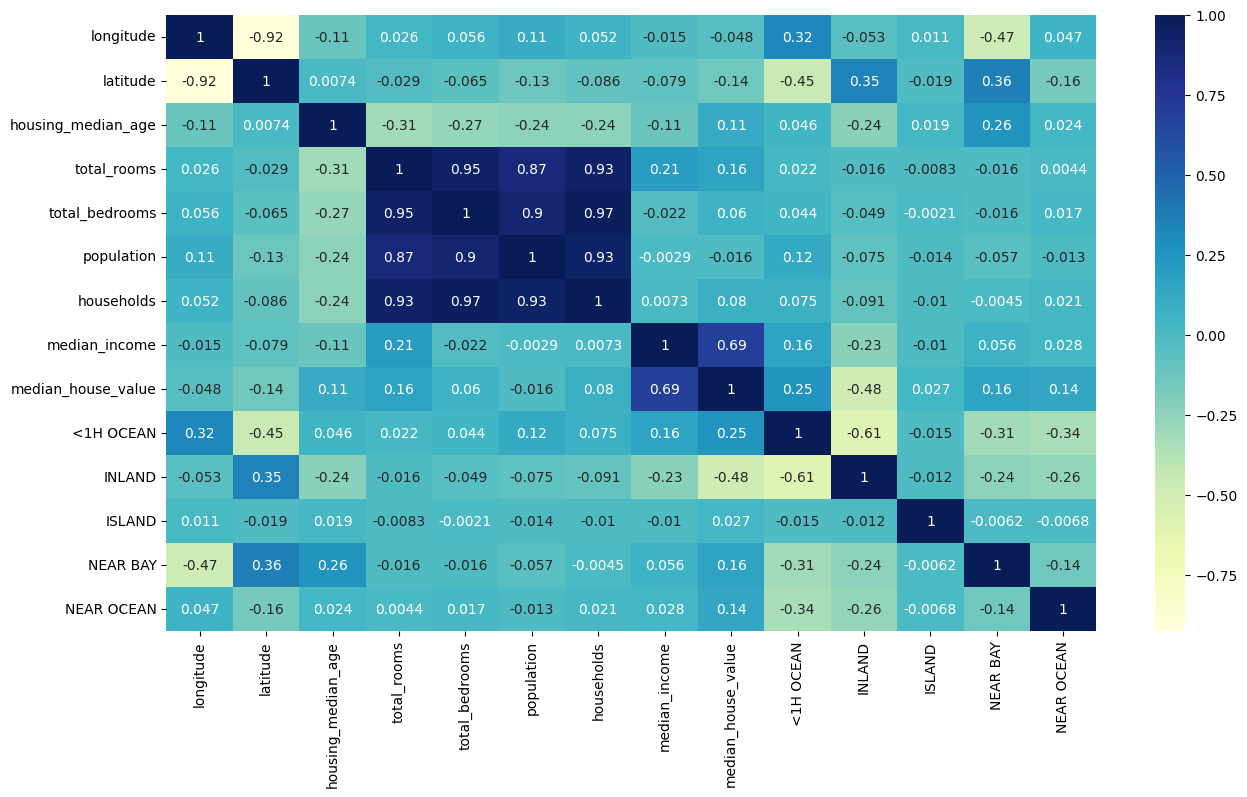

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

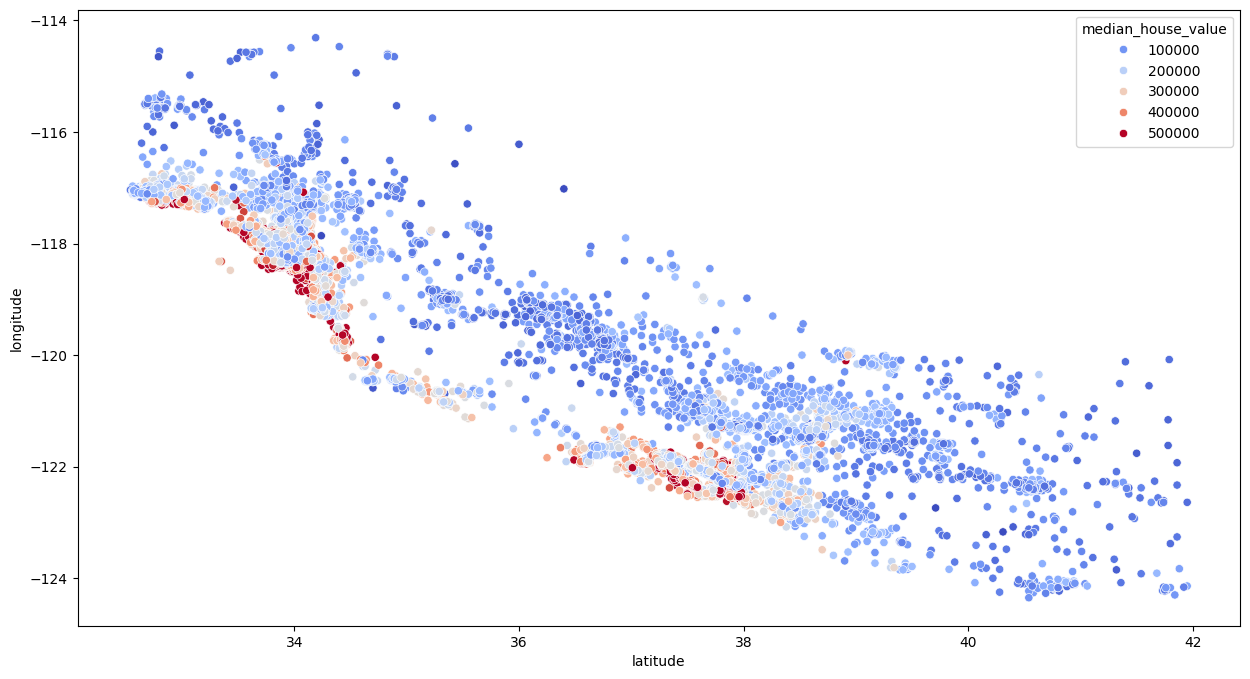

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

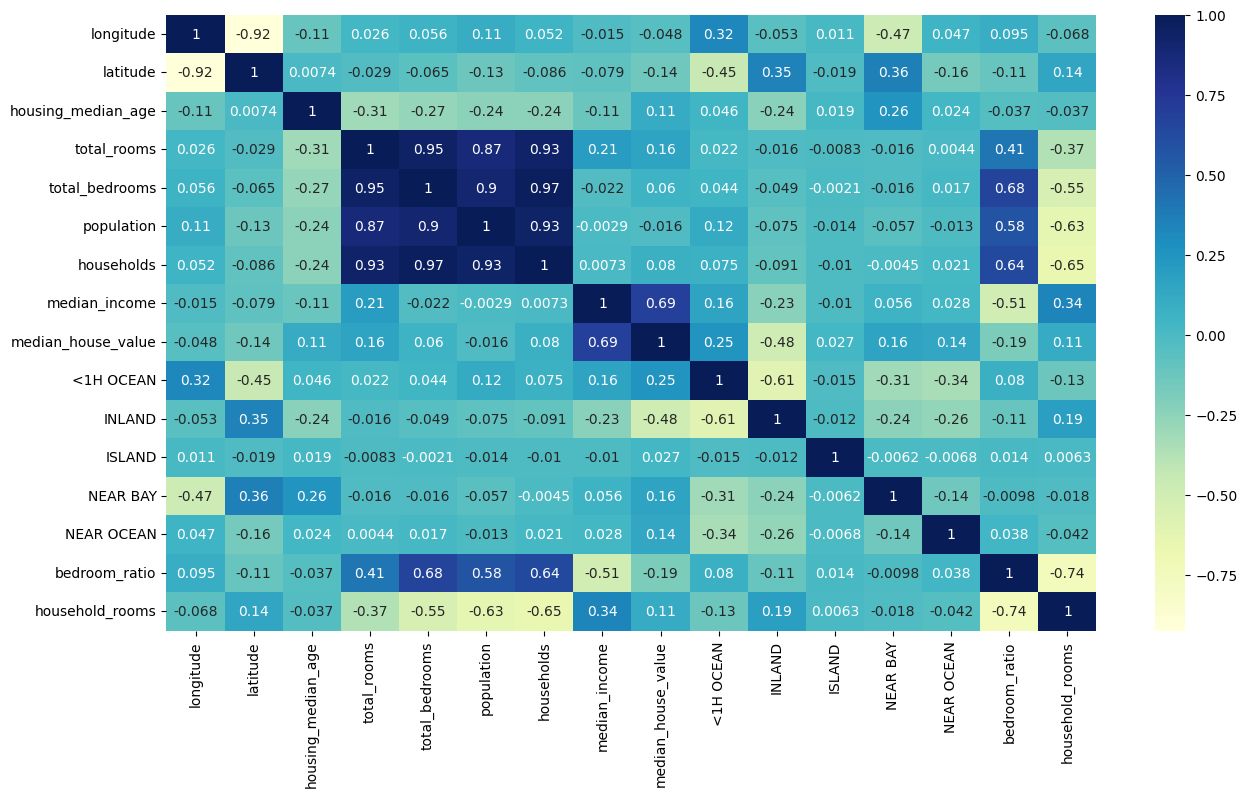

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [ ]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [ ]:
X_test_s = scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ISLAND


In [ ]:
reg.score(X_test_s, y_test)

NameError: name 'X_test_s' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test_s, y_test)

0.8198512007135056

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    # improve the score by adding more stuff to the parameter grid
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                            return_train_score=True)

grid_search.fit(X_train_s, y_train)

KeyboardInterrupt: 

In [ ]:
# best_forest = grid_search.best_estimator_

In [ ]:
# best_forest.score(X_test_s, y_test)

0.8075974539214947